In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import pandas as pd
import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorozcoceron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorozcoceron/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import os 

In [4]:
path = "/Users/lorozcoceron/Proyecto_integrador_MSc/Extraccion de texto/"

In [5]:
filenames = os.listdir(path)

In [6]:
filenames[:5]

['2020-4330-2019-PAS-TR1-MAI.txt',
 '2020-12969-50834-FQ-TR1-MAI.txt',
 '2020-4330-49958-FQ-TR1-MAI.txt',
 '12914-50286-FQ.txt',
 '13353-47649-ATR3 FASE N°1 CDBC FQ.txt']

In [7]:
tag = []
tag_original = pd.DataFrame(columns = ["document", "tag"])
for i in range(len(filenames)):
    tag_original.loc[i] = None
    if "-FQ" in filenames[i]:
        tag.append("Aceites")
    elif "-CR" in filenames[i]:
        tag.append("Gases")
    elif "-FU" in filenames[i]:
        tag.append("Furanos")
    else:
        tag.append("otros")

    tag_original["document"].loc[i] = filenames[i]
    tag_original["tag"].loc[i] = tag[i]

In [8]:
tag_original["tag"].value_counts()

otros      207
Aceites    200
Gases       98
Furanos      2
Name: tag, dtype: int64

In [9]:
tag_original

,document,tag
0,2020-4330-2019-PAS-TR1-MAI.txt,otros
1,2020-12969-50834-FQ-TR1-MAI.txt,Aceites
2,2020-4330-49958-FQ-TR1-MAI.txt,Aceites
3,12914-50286-FQ.txt,Aceites
4,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,otros
...,...,...
502,2019-4854-44929-FQ-TR9-PAZ.txt,Aceites
503,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,Aceites
504,2019 - 4700048304 PCB.txt,otros
505,2019-12691-62132-CR-TR10-PAZ.txt,Gases


In [10]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return(f.read())
  
list_with_text = []
  
# iterate through all file
for filename in filenames:
    # Check whether file is in text format or not
    if filename.endswith(".txt"):
        file_path = f"{path}{filename}"
  
        # call read text file function
        str_file = read_text_file(file_path)
        list_with_text.append(str_file)

In [11]:
list_with_text[0]

'       JORPA INGENIERÍA S.A.                                           RL-39 V2019 R1\n            Servicios de Ingeniería\n        Fonos: (2)29598900 – 29598913\nDresden N° 4688- 4672 – San Miguel – Santiago\n                                                      ANÁLISIS DE CONCENTRACIÓN DE\n                     CHILE                                      ADITIVOS\n                      1/1\n\n\n\nEMPRESA:     TRANSELEC S.A.                                                                             FECHA:             26/02/2020\nOT:          6259                                                                                       EQUIPO / DIAGNÓSTICO\nID. EQUIPO:  Autotransformador TAG ATR-1 ABB Nº 89391                                                     4330       4330\nPOT. MÁXIMA: 90                        MVA                                                              FECHA MUESTREO:       19/12/2019\nVOLTAJE:     220/110/13,2               kV                                  

In [12]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(list_with_text)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(list_with_text[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    document = unidecode.unidecode(document)
    
    documents.append(document)

In [13]:
documents[0]

'jorpa ingenieria a rl 39 v2019 r1 servicios de ingenieria fonos 2 29598900 29598913 dresden 4688 4672 san miguel santiago analisis de concentracion de chile aditivos 1 1 empresa transelec a fecha 26 02 2020 ot 6259 equipo diagnostico id equipo autotransformador tag atr 1 abb no 89391 4330 4330 pot maxima 90 mva fecha muestreo 19 12 2019 voltaje 220 110 13 2 kv fecha recepcion 27 12 2019 lugar e maitencillo fecha analisis 03 02 2020 diagnostico anterior no tiene ano fabricacion 2005 fecha no tiene punto muestreo nivel inferior estanque limite aceite limite aceite en prueba unidad metodo resultado nuevo servicio analisis de contenido de astm 2668 nr 0 08 0 40 0 18 inhibidor bht dbpc analisis de contenido de bta ppm cigre wg a2 32 tf 02 1 20 45 10 analisis de contenido de ppm cigre wg a2 32 tf 02 81 irgamet 39 la concentracion de irgamet 39 recomendada para transformadores con presencia de dibencil disulfuro e 100 ppm el nombre comercial del pasivador metalico puede ser irgamet 39 nypa b

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [15]:
X

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [23]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.12335813,
        0.06167907],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03399581, 0.        , 0.        , ..., 0.03222767, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0291684 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03256898, 0.        , 0.        , ..., 0.03087505, 0.        ,
        0.        ]])

In [24]:
# Creando Target
key_words_aceites = ["temperatura aceite", "humedad", "rigidez dielectrica", "tension interfacial", "numero neutralizacion", "color"]

In [25]:
# Creando Target
key_words_gases = ["nitrogeno", "oxigeno", "dioxido de carbono", "metano", "etileno", "acetileno"]

In [26]:
key_words_furanos = ["hidroximetil", "furfuril", "metil", "polimerización", "furfural", "acetilfurfural"]

In [27]:
key_words = key_words_aceites + key_words_furanos + key_words_gases

In [29]:
doc_labels = pd.DataFrame(columns=key_words)

In [30]:
doc_labels["Nombre documento"] = None
doc_labels["Target"] = None


In [31]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target


In [32]:
for index_document in range(len(documents)):
    doc_labels.loc[index_document] = None
    doc = documents[index_document]
    doc_labels.loc[index_document]["Nombre documento"] = filenames[index_document]
    for key_word in key_words:
        doc_labels.loc[index_document][key_word] = 1 if key_word in doc else 0


In [33]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020-4330-2019-PAS-TR1-MAI.txt,NaN
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12969-50834-FQ-TR1-MAI.txt,NaN
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2020-4330-49958-FQ-TR1-MAI.txt,NaN
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,12914-50286-FQ.txt,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-4854-44929-FQ-TR9-PAZ.txt,NaN
503,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,NaN
504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019 - 4700048304 PCB.txt,NaN
505,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2019-12691-62132-CR-TR10-PAZ.txt,NaN


In [36]:
for i in range(len(doc_labels)):
    if doc_labels[key_words_aceites].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Aceites"
    elif doc_labels[key_words_gases].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Gases"
    elif doc_labels[key_words_furanos].sum(axis=1).loc[i]>2:
        doc_labels.loc[i]["Target"] = "Furanos"
    else:
        doc_labels.loc[i]["Target"] = "Otros"

In [37]:
doc_labels

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno,Nombre documento,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020-4330-2019-PAS-TR1-MAI.txt,Otros
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12969-50834-FQ-TR1-MAI.txt,Aceites
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2020-4330-49958-FQ-TR1-MAI.txt,Aceites
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,12914-50286-FQ.txt,Aceites
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13353-47649-ATR3 FASE N°1 CDBC FQ.txt,Aceites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-4854-44929-FQ-TR9-PAZ.txt,Aceites
503,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12-2019 - 13531-48311-FQ-BCO-ATR2 FASE N°2 CDB...,Aceites
504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019 - 4700048304 PCB.txt,Otros
505,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2019-12691-62132-CR-TR10-PAZ.txt,Gases


In [41]:
doc_labels["Target"].value_counts()

Aceites    283
Gases      143
Otros       79
Furanos      2
Name: Target, dtype: int64

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [53]:
X_train = doc_labels[key_words]

In [54]:
X_train.head()

,temperatura aceite,humedad,rigidez dielectrica,tension interfacial,numero neutralizacion,color,hidroximetil,furfuril,metil,polimerización,furfural,acetilfurfural,nitrogeno,oxigeno,dioxido de carbono,metano,etileno,acetileno
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<ipython-input-55-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-55-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-55-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-55-529f03d26f08>:4: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
<ipython-input-55-529f03d26f08>:4: Conve

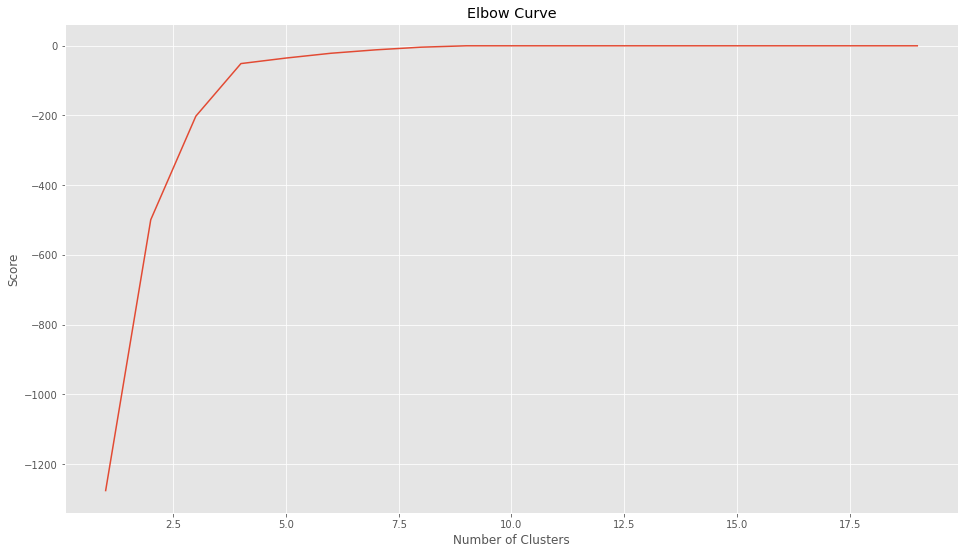

In [55]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4).fit(X_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 9.85401460e-01  1.00000000e+00  9.85401460e-01 -2.77555756e-16
   4.44089210e-16  1.45985401e-02  1.45985401e-02  1.45985401e-02
   1.45985401e-02  0.00000000e+00  1.45985401e-02  1.45985401e-02
   5.55111512e-17  1.45985401e-02 -5.55111512e-17 -2.22044605e-16
  -2.22044605e-16 -2.22044605e-16]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.47945205e-02  2.77555756e-16  0.00000000e+00 -2.22044605e-16
  -2.22044605e-16 -2.22044605e-16]
 [ 9.86206897e-01  1.37931034e-02  0.00000000e+00  1.37931034e-02
   4.44089210e-16  1.37931034e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00  9.86206897e-01  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 2.22044605e-16  4.44089210e-16  0.00000000e+00 -1.11022302e-16
   2.22044605e-16 -1.11022302e-16  0.

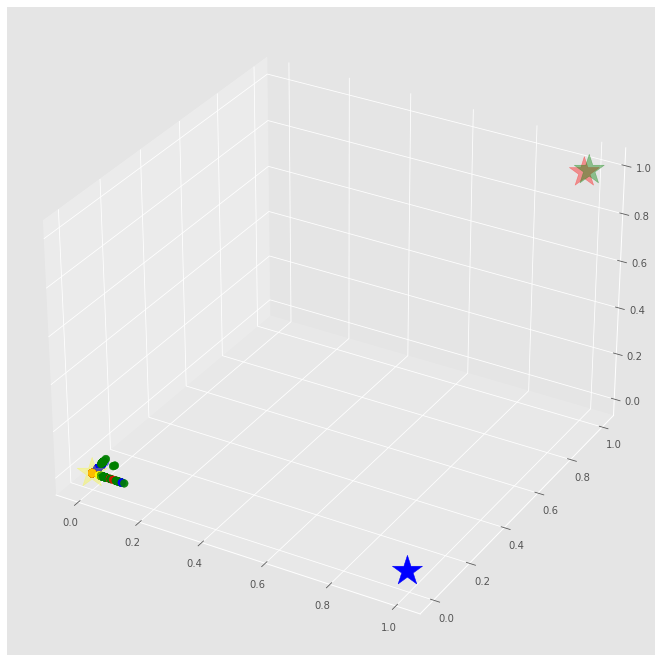

In [57]:
# Predicting the clusters
labels = kmeans.predict(X_train)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [51]:
from collections import Counter

In [58]:
Counter(labels)

Counter({3: 79, 0: 137, 1: 146, 2: 145})